In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(81, 4)

In [4]:
df.columns

Index(['STT', 'CÂU HỎI', 'LOẠI CÂU HỎI', 'KẾT QUẢ'], dtype='object')

In [5]:
df.__dataframe__

<bound method DataFrame.__dataframe__ of     STT                                            CÂU HỎI  LOẠI CÂU HỎI  \
0     1  Trong thời gian gần đây, bạn có thường xuyên c...             2   
1     2  Bạn có cảm thấy mất hứng thú với những hoạt độ...             2   
2     3  Bạn có cảm thấy khó khăn hay không còn tìm thấ...             2   
3     4  Bạn có bao giờ cảm thấy tuyệt vọng hoặc không ...             3   
4     5  Bạn có cảm thấy mình là gánh nặng cho người kh...             3   
..  ...                                                ...           ...   
76   77     Bạn có hành vi liều lĩnh hoặc nguy hiểm không?             3   
77   78  Bạn có gặp khó khăn trong việc hoàn thành các ...             2   
78   79  Bạn có cảm thấy khó khăn trong việc chăm sóc b...             2   
79   80  Bạn có gặp khó khăn trong việc duy trì các mối...             2   
80   81  Bạn có cảm thấy khó khăn trong việc tập trung ...             3   

    KẾT QUẢ  
0         0  
1         0  
2   

In [7]:
df.head()

,STT,CÂU HỎI,LOẠI CÂU HỎI,KẾT QUẢ
0,1,"Trong thời gian gần đây, bạn có thường xuyên c...",2,0
1,2,Bạn có cảm thấy mất hứng thú với những hoạt độ...,2,0
2,3,Bạn có cảm thấy khó khăn hay không còn tìm thấ...,2,0
3,4,Bạn có bao giờ cảm thấy tuyệt vọng hoặc không ...,3,1
4,5,Bạn có cảm thấy mình là gánh nặng cho người kh...,3,1



Nếu mặt Ngửa thì khách hàng trả lời thật
Bạn có tin rằng mình không xứng đáng được yêu thương hoặc hạnh phúc không? (YES/NO): Đồng xu là mặt  Ngửa
Bạn có cảm thấy khó kiểm soát cơn giận của mình không? (YES/NO): Đồng xu là mặt  Sấp
Điều gì làm bạn lo lắng hay căng thẳng? (YES/NO): Đồng xu là mặt  Sấp
Có bao giờ bạn thấy mình quá kém cỏi không làm được việc gì cả (YES/NO): Đồng xu là mặt  Sấp
Bạn có cảm thấy bồn chồn, lo lắng hoặc dễ cáu kỉnh không? (YES/NO): Đồng xu là mặt  Ngửa
Bạn có hành vi liều lĩnh hoặc nguy hiểm không? (YES/NO): Đồng xu là mặt  Sấp
Bạn có lạm dụng chất kích thích như rượu bia, ma túy hoặc thuốc lá không? (YES/NO): Đồng xu là mặt  Ngửa
Có bao giờ bạn nghĩ mình bất tài không? (YES/NO): Đồng xu là mặt  Sấp
Bạn có thường xuyên cảm thấy lo lắng hoặc căng thẳng về một điều gì đó không? (YES/NO): Đồng xu là mặt  Sấp
Bạn có dễ bị phân tâm bởi những suy nghĩ hoặc cảm xúc khác không? (YES/NO): Đồng xu là mặt  Sấp
Bạn có cảm thấy khó ghi nhớ ở dạo gần đây không? (YES/NO): 

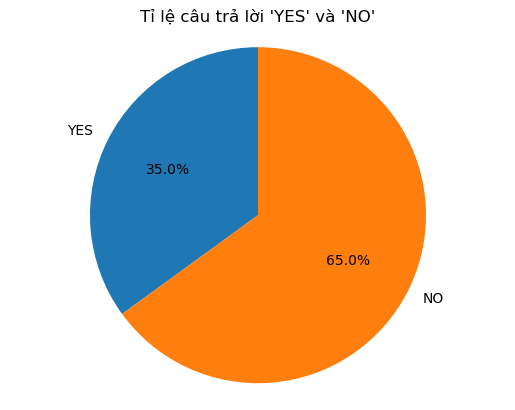

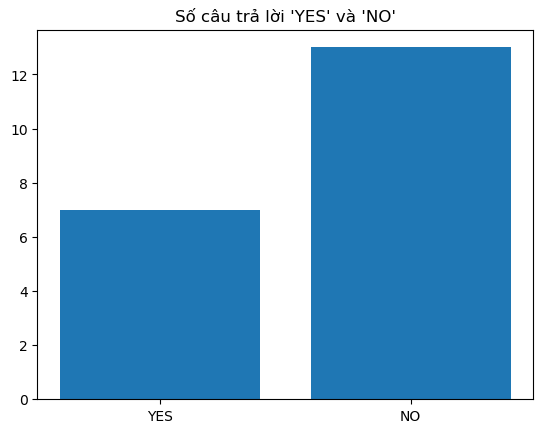

In [4]:

def questions_random(data, so_luong=20):
  """
  Chọn ngẫu nhiên một số lượng câu hỏi từ DataFrame.

  Args:
    data: DataFrame chứa dữ liệu.
    so_luong: Số lượng câu hỏi cần chọn.

  Returns:
    Danh sách các câu hỏi được chọn ngẫu nhiên.
  """

  cau_hoi_ngau_nhien = random.sample(list(data['CÂU HỎI']), so_luong)
  return cau_hoi_ngau_nhien

# Đọc dữ liệu từ file CSV
data = pd.read_csv('data.csv')

# Chọn ngẫu nhiên 20 câu hỏi
cau_hoi_chon = questions_random(data, 20)

# Hàm để tung đồng xu
def flip_coin():
    return random.choice(["Ngửa", "Sấp"])
print("\nNếu mặt Ngửa thì khách hàng trả lời thật")
# Hàm để hỏi khách hàng và thu thập câu trả lời
def collect_answers(questions):
    answers = []
    for question in questions:
        print(f"{question} (YES/NO): ", end="")
        a = flip_coin()
        print("Đồng xu là mặt ",a)
        if a == "Ngửa":
            answer = input("Nhập đáp án (YES hoặc NO): ")
            while answer.upper() not in ["YES", "NO"]:
                print("Vui lòng nhập YES hoặc NO.")
                answer = input("Nhập lại đáp án (YES hoặc NO): ")
        elif(flip_coin() == "Ngửa"):
            answer = "YES"
        else:
            answer = "NO"
        answers.append(answer.strip().upper())
    return answers

# Thu thập câu trả lời từ khách hàng
customer_answers = collect_answers(cau_hoi_chon)

# Tạo DataFrame từ câu hỏi và câu trả lời
df = pd.DataFrame({'Câu hỏi': cau_hoi_chon, 'Câu trả lời': customer_answers})

# Tính toán số câu trả lời "YES"
so_cau_yes = df['Câu trả lời'].value_counts()['YES']

# Xếp loại trầm cảm
def xep_loai_tram_cam(so_cau_yes):
    if so_cau_yes >= 15:
        return "Nặng"
    elif so_cau_yes <= 14 | so_cau_yes >=8:
        return "Nhẹ"
    else:
        return "Bình thường"


loai_tram_cam = xep_loai_tram_cam(so_cau_yes)

# In kết quả
print("\nKết quả:")
print(f"Số câu trả lời 'YES': {so_cau_yes}")
print(f"Xếp loại trầm cảm: {loai_tram_cam}")

# Trực quan hóa dữ liệu
# Vẽ biểu đồ tròn thể hiện tỉ lệ câu trả lời YES/NO
labels = ['YES', 'NO']
sizes = [so_cau_yes, len(customer_answers) - so_cau_yes]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title("Tỉ lệ câu trả lời 'YES' và 'NO'")
plt.show()

# Vẽ biểu đồ cột thể hiện số câu trả lời YES theo mức độ trầm cảm
unique_answers = list(set(customer_answers))
counts = [customer_answers.count(answer) for answer in unique_answers]
plt.bar(unique_answers, counts)
plt.title("Số câu trả lời 'YES' và 'NO'")
plt.show()

In [16]:
df

,Câu hỏi,Câu trả lời
0,Bạn có tin rằng mình không xứng đáng được yêu ...,YES
1,Bạn có cảm thấy khó kiểm soát cơn giận của mìn...,YES
2,Điều gì làm bạn lo lắng hay căng thẳng?,NO
3,Có bao giờ bạn thấy mình quá kém cỏi không làm...,YES
4,"Bạn có cảm thấy bồn chồn, lo lắng hoặc dễ cáu ...",NO
5,Bạn có hành vi liều lĩnh hoặc nguy hiểm không?,NO
6,"Bạn có lạm dụng chất kích thích như rượu bia, ...",NO
7,Có bao giờ bạn nghĩ mình bất tài không?,YES
8,Bạn có thường xuyên cảm thấy lo lắng hoặc căng...,NO
9,Bạn có dễ bị phân tâm bởi những suy nghĩ hoặc ...,NO
